In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [2]:
nt = 50           # number of temperature points
N=10              # size of lattice, N x N
eqsteps = 100     # number of MC sweeps for equilibration
mcsteps = 100     # number of MC sweeps for calculation

T = np.linspace(1.53, 3.28, nt)
Energy, Magnetization, SpecificHeat, Susceptibility = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n=1/(mcsteps*N*N)

In [3]:
state = 2*np.random.randint(2,size=(N,N))-1 
print(state) 

[[-1 -1 -1  1 -1  1  1  1  1  1]
 [ 1  1 -1  1  1  1  1  1  1  1]
 [ 1 -1 -1  1 -1  1 -1 -1  1  1]
 [-1 -1 -1 -1  1  1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1 -1  1]
 [-1 -1 -1  1  1 -1 -1 -1  1  1]
 [ 1  1  1 -1  1 -1  1  1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1  1  1  1]
 [-1  1  1 -1  1 -1 -1 -1 -1  1]
 [ 1  1  1 -1 -1  1  1  1 -1 -1]]


In [4]:
for t in range(nt):
    Beta = 1/T[t]

    for i in range(eqsteps):
        for j in range(N):
            for k in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                sig_i =  state[a, b]
                sig_j = state[(a+1)%N,b] + state[(a-1)%N,b] + state[a,(b+1)%N] + state[a,(b-1)%N]
                delta_E = 2*sig_i*sig_j

                if delta_E <0:
                    sig_i *= -1
                elif rand() < np.exp(-delta_E*Beta):
                    sig_i *= -1
                state[a,b] = sig_i
    E=0
    M=0
    for i in range(mcsteps):
        for j in range(N):
            for k in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                sig_i =  state[a, b]
                sig_j = state[(a+1)%N,b] + state[(a-1)%N,b] + state[a,(b+1)%N] + state[a,(b-1)%N]
                delta_E = 2*sig_i*sig_j

                if delta_E <0:
                    sig_i *= -1
                elif rand() < np.exp(-delta_E*Beta):
                    sig_i *= -1
                state[a,b] = sig_i

        E += -sig_i*sig_j
        M += np.sum(state)
    
    Energy[t] = n*E
    Magnetization[t] = M*n





In [5]:
Energy

array([-0.04  , -0.0398, -0.0392, -0.0384, -0.0382, -0.038 , -0.0366,
       -0.0384, -0.0386, -0.0364, -0.0376, -0.0368, -0.0346, -0.0354,
       -0.0362, -0.0348, -0.0318, -0.0332, -0.0334, -0.027 , -0.0294,
       -0.0334, -0.021 , -0.0314, -0.0192, -0.0284, -0.0226, -0.0282,
       -0.0202, -0.0202, -0.0194, -0.0208, -0.0224, -0.0182, -0.019 ,
       -0.0172, -0.0148, -0.0132, -0.0162, -0.0164, -0.0154, -0.015 ,
       -0.02  , -0.0152, -0.0128, -0.014 , -0.0136, -0.016 , -0.0144,
       -0.01  ])

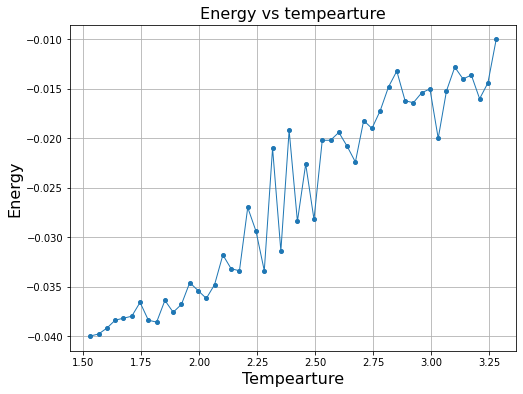

In [6]:
plt.figure(figsize=(8,6))
plt.plot(T,Energy,'o-',lw=1, ms=4)
plt.title('Energy vs tempearture',fontsize=16)
plt.xlabel('Tempearture',fontsize=16)
plt.ylabel('Energy',fontsize=16)
plt.grid()




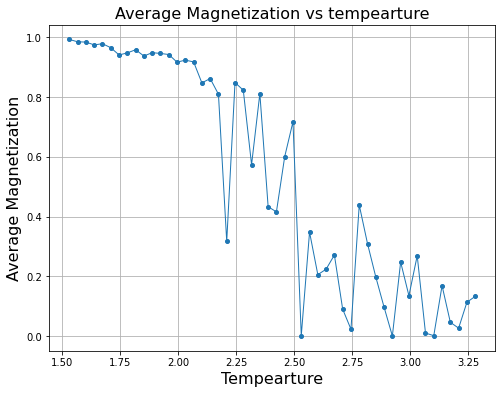

In [7]:
plt.figure(figsize=(8,6))
plt.plot(T,abs(Magnetization),'o-',lw=1, ms=4)
plt.title('Average Magnetization vs tempearture',fontsize=16)
plt.xlabel('Tempearture',fontsize=16)
plt.ylabel('Average Magnetization',fontsize=16)
plt.grid()

In [8]:
np.exp(-delta_E*Beta)
print(state)

[[-1 -1 -1  1  1  1 -1  1  1  1]
 [ 1  1 -1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1 -1]
 [ 1  1  1  1  1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1 -1  1  1]
 [ 1 -1  1  1  1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1  1 -1 -1]
 [ 1  1  1  1 -1  1  1 -1 -1 -1]
 [ 1  1  1  1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1 -1  1 -1  1  1  1]]


In [24]:
lattice = [2,4,6]

Energy, Magnetization, SpecificHeat, Susceptibility = np.zeros((len(lattice),nt)), np.zeros((len(lattice),nt)), np.zeros((len(lattice),nt)), np.zeros((len(lattice),nt))

for N in lattice:
  n=1/(mcsteps*N*N)

  for t in range(nt):
    Beta = 1/T[t]

    for i in range(eqsteps):
        for j in range(N):
            for k in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                sig_i =  state[a, b]
                sig_j = state[(a+1)%N,b] + state[(a-1)%N,b] + state[a,(b+1)%N] + state[a,(b-1)%N]
                delta_E = 2*sig_i*sig_j

                if delta_E <0:
                    sig_i *= -1
                elif rand() < np.exp(-delta_E*Beta):
                    sig_i *= -1
                state[a,b] = sig_i
    E=0
    M=0
    for i in range(mcsteps):
        for j in range(N):
            for k in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                sig_i =  state[a, b]
                sig_j = state[(a+1)%N,b] + state[(a-1)%N,b] + state[a,(b+1)%N] + state[a,(b-1)%N]
                delta_E = 2*sig_i*sig_j

                if delta_E <0:
                    sig_i *= -1
                elif rand() < np.exp(-delta_E*Beta):
                    sig_i *= -1
                state[a,b] = sig_i

        E += -sig_i*sig_j
        M += np.sum(state)
    
    Energy[N,t] = n*E
    Magnetization[N,t] = M*n
    


  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [21]:
Energy

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])